In [133]:
import pandas as pd
import numpy as np

In [134]:
import warnings
warnings.filterwarnings('ignore')

In [135]:
crop = pd.read_csv(r'C:\Projects\Farmee\Farmee\cropprediction.csv')

In [136]:
crop.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [137]:
crop.shape

(1100, 8)

In [138]:
crop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1100 entries, 0 to 1099
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            1100 non-null   int64  
 1   P            1100 non-null   int64  
 2   K            1100 non-null   int64  
 3   temperature  1100 non-null   float64
 4   humidity     1100 non-null   float64
 5   ph           1100 non-null   float64
 6   rainfall     1100 non-null   float64
 7   label        1100 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 68.9+ KB


In [139]:
crop.isnull().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

In [140]:
crop.duplicated().sum()

np.int64(0)

In [141]:
crop.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000
mean,59.138182,48.968182,29.923636,27.415288,72.956435,6.408545,122.073067
std,37.572726,20.103506,11.805660,4.485250,16.240100,0.688040,59.798816
min,0.000000,5.000000,15.000000,18.041855,30.400468,4.507524,36.120429
25%,27.000000,35.000000,20.000000,24.653419,60.488011,5.950657,74.119955
50%,56.000000,50.000000,26.000000,27.132002,77.457230,6.456916,100.088416
75%,93.000000,63.000000,38.000000,29.384181,84.640721,6.880292,165.758277
max,140.000000,95.000000,55.000000,43.675493,99.981876,7.994680,298.560117


In [142]:
corr=crop.corr(numeric_only=True)
corr

,N,P,K,temperature,humidity,ph,rainfall
N,1.000000,0.145389,0.199864,-0.399860,0.105910,0.210743,0.063593
P,0.145389,1.000000,0.193801,0.080058,-0.039818,0.065970,-0.196584
K,0.199864,0.193801,1.000000,0.221192,0.405862,-0.114256,0.392442
temperature,-0.399860,0.080058,0.221192,1.000000,0.035224,0.023141,-0.117051
humidity,0.105910,-0.039818,0.405862,0.035224,1.000000,0.179481,0.138950
ph,0.210743,0.065970,-0.114256,0.023141,0.179481,1.000000,-0.147838
rainfall,0.063593,-0.196584,0.392442,-0.117051,0.138950,-0.147838,1.000000


<Axes: >

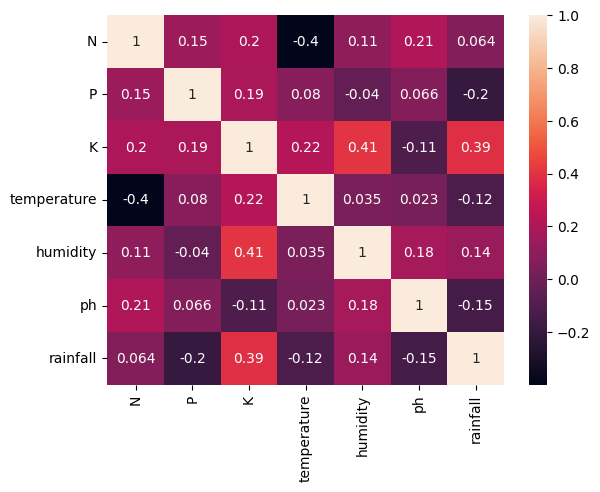

In [143]:
import seaborn as sns
sns.heatmap(corr, annot=True, cbar= True)

In [144]:
crop.label.value_counts()

label
rice          100
maize         100
pigeonpeas    100
mungbean      100
blackgram     100
banana        100
mango         100
papaya        100
coconut       100
cotton        100
coffee        100
Name: count, dtype: int64

In [145]:
crop['label'].unique()

array(['rice', 'maize', 'pigeonpeas', 'mungbean', 'blackgram', 'banana',
       'mango', 'papaya', 'coconut', 'cotton', 'coffee'], dtype=object)

In [146]:
crop['label'].unique().size

11

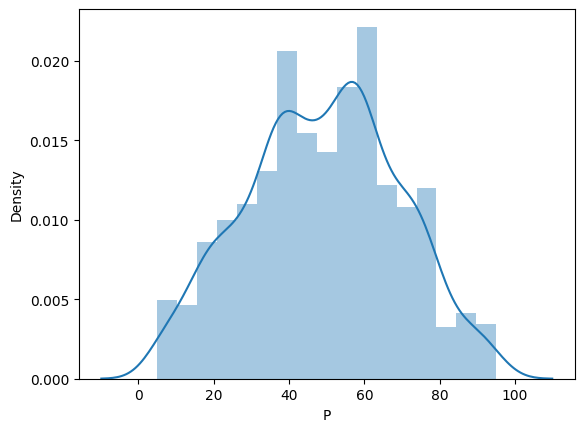

In [147]:
import matplotlib.pyplot as plt
sns.distplot(crop['P'])
plt.show()

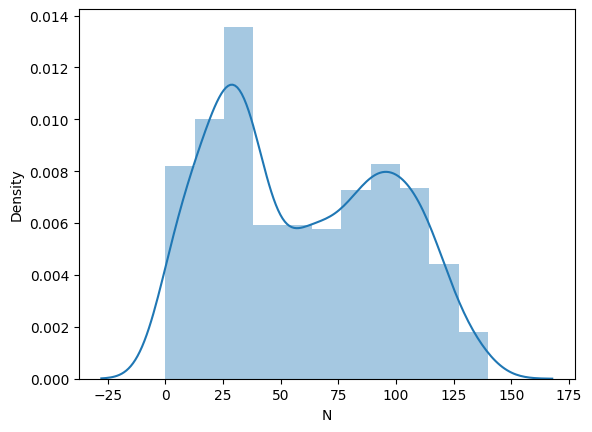

In [148]:
import matplotlib.pyplot as plt
sns.distplot(crop['N'])
plt.show()

In [149]:
crop['label'].unique()

array(['rice', 'maize', 'pigeonpeas', 'mungbean', 'blackgram', 'banana',
       'mango', 'papaya', 'coconut', 'cotton', 'coffee'], dtype=object)

In [150]:
crop_dict={
    'rice': 1,
    'maize': 2,
    'pigeonpeas': 3,
    'mungbean': 4,
    'blackgram': 5,
    'banana': 6,
    'mango': 7,
    'papaya': 8,
    'coconut': 9,
    'cotton': 10,
    'coffee':11
}

crop['label'] = crop['label'].map(crop_dict)

In [151]:
crop.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,1
1,85,58,41,21.770462,80.319644,7.038096,226.655537,1
2,60,55,44,23.004459,82.320763,7.840207,263.964248,1
3,74,35,40,26.491096,80.158363,6.980401,242.864034,1
4,78,42,42,20.130175,81.604873,7.628473,262.717340,1


In [152]:
crop['label'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])

In [153]:
crop['label'].value_counts()

label
1     100
2     100
3     100
4     100
5     100
6     100
7     100
8     100
9     100
10    100
11    100
Name: count, dtype: int64

In [154]:
X = crop.drop('label', axis=1)
y = crop['label']

In [155]:
X.head()

,N,P,K,temperature,humidity,ph,rainfall
0,90,42,43,20.879744,82.002744,6.502985,202.935536
1,85,58,41,21.770462,80.319644,7.038096,226.655537
2,60,55,44,23.004459,82.320763,7.840207,263.964248
3,74,35,40,26.491096,80.158363,6.980401,242.864034
4,78,42,42,20.130175,81.604873,7.628473,262.717340


In [156]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: label, dtype: int64

In [157]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [158]:
X_train.shape

(880, 7)

In [159]:
X_test.shape

(220, 7)

In [160]:
from sklearn.preprocessing import MinMaxScaler
mx = MinMaxScaler()
X_train = mx.fit_transform(X_train)
X_test = mx.transform(X_test)

In [161]:
X_train

array([[0.77142857, 0.93333333, 0.95      , ..., 0.68505599, 0.37307596,
        0.2402247 ],
       [0.82857143, 0.84444444, 1.        , ..., 0.76599537, 0.40377399,
        0.22412419],
       [0.16428571, 0.55555556, 0.025     , ..., 0.56467591, 0.17319709,
        0.56767755],
       ...,
       [0.62142857, 0.2       , 0.325     , ..., 0.45795966, 0.70890637,
        0.60025646],
       [0.76428571, 0.32222222, 0.425     , ..., 0.51756355, 0.65168875,
        0.53934299],
       [0.14285714, 0.26666667, 0.3       , ..., 0.89047533, 0.44148321,
        0.46300804]])

In [162]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, ExtraTreeClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.metrics import accuracy_score

In [163]:
models = {
    'LogisticRegression': LogisticRegression(),
    'GaussianNB': GaussianNB(),
    'SVC': SVC(),
    'KNeighborsClassifier': KNeighborsClassifier(),
    'DecisionTreeClassifier': DecisionTreeClassifier(),
    'ExtraTreeClassifier': ExtraTreeClassifier(),
    'RandomForestClassifier': RandomForestClassifier(),
    'BaggingClassifier': BaggingClassifier(),
    'GradientBoostingClassifier': GradientBoostingClassifier(),
    'AdaBoostClassifier': AdaBoostClassifier()
}

In [164]:
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    score = accuracy_score(y_test, y_pred)
    print(f"{name} mode with accuracy: {score}")

LogisticRegression mode with accuracy: 0.9772727272727273
GaussianNB mode with accuracy: 0.9954545454545455
SVC mode with accuracy: 1.0
KNeighborsClassifier mode with accuracy: 0.9954545454545455
DecisionTreeClassifier mode with accuracy: 0.9954545454545455
ExtraTreeClassifier mode with accuracy: 0.9272727272727272
RandomForestClassifier mode with accuracy: 0.9954545454545455
BaggingClassifier mode with accuracy: 0.9954545454545455
GradientBoostingClassifier mode with accuracy: 1.0
AdaBoostClassifier mode with accuracy: 0.37272727272727274


In [165]:
randclf = RandomForestClassifier()
randclf.fit(X_train, y_train)
y_pred = randclf.predict(X_test)
accuracy_score(y_test, y_pred)

0.9954545454545455

In [166]:
knn= KNeighborsClassifier()
knn.fit(X_train, y_train)
y_pred=knn.predict(X_test)
accuracy_score(y_test,y_pred)

0.9954545454545455

In [167]:
crop.columns

Index(['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'label'], dtype='object')

In [168]:
def recommendation(N, P, K, temperature, humidity, ph, rainfall):
    features = np.array([[N, P, K, temperature, humidity, ph, rainfall]])
    mx_features = mx.transform(features)
    prediction = knn.predict(mx_features).reshape(1,-1)
    return prediction[0]

In [169]:
crop.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,1
1,85,58,41,21.770462,80.319644,7.038096,226.655537,1
2,60,55,44,23.004459,82.320763,7.840207,263.964248,1
3,74,35,40,26.491096,80.158363,6.980401,242.864034,1
4,78,42,42,20.130175,81.604873,7.628473,262.717340,1


In [170]:
N = 40   
P = 16
K = 36
temperature = 29.879744
humidity = 86.002744
ph = 6.502985
rainfall = 89
rec=recommendation(N, P, K, temperature, humidity, ph, rainfall)
cropname=list(crop_dict.keys())[list(crop_dict.values()).index(rec)]
print(f'Recommended crop: {cropname}')

Recommended crop: coconut


In [173]:
#import pickle
#from sklearn.preprocessing import StandardScaler
#pickle.dump(knn, open('model.pkl', 'wb'))
#pickle.dump(mx, open('minmaxscaler.pkl', 'wb'))



['scaler.pkl']